## 数据集说明

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
import sqlite3

In [2]:
conn = sqlite3.connect(r"C:\Users\m1533\Desktop\研一下\python\项目\energy_clustering-master\dataport_sqlite") 
cursor = conn.cursor()
query = "SELECT * FROM new_table;"
cursor.execute(query)
data = cursor.fetchall()

In [3]:
df=pd.DataFrame(data,columns=["id","date","energy_use"])
df.head()

,id,date,energy_use
0,26,2015-08-01 00:00:00,1.4090666666666667
1,26,2015-07-31 23:45:00,3.1387333333333333
2,26,2015-07-31 23:30:00,4.2021333333333333
3,26,2015-07-31 23:15:00,4.2418000000000000
4,26,2015-07-31 23:00:00,4.2857333333333333


变量说明
* id 代表家庭
* date 代表每隔十五分钟收集数据
* energy_use 代表用电量单位千瓦

In [4]:
print("当前数据有%s行，有%s列"%(df.shape[0],df.shape[1]))

当前数据有646981行，有3列


In [5]:
print("最早时间为：%s，最晚时间为：%s"%(df.date.min(),df.date.max()))#记录2015年七月的用电量

最早时间为：2015-07-01 00:00:00，最晚时间为：2015-08-01 00:00:00


In [6]:
df['id'].value_counts()#一共220户的数据

2818    2977
232     2977
3886    2977
1790    2977
507     2977
        ... 
3652    2604
297     1660
490     1447
2974    1188
1508     107
Name: id, Length: 220, dtype: int64

In [7]:
print("共有{}个不同家庭".format(df.id.nunique()))

共有220个不同家庭


## 数据处理

### 删除缺失值

In [8]:
df= df.replace("",np.nan)#用nan取代空缺值
df.isnull().sum()# energy_use缺失10695个数据，但也不一定吧

id                0
date              0
energy_use    10695
dtype: int64

In [9]:
df=df.dropna()
df.shape

(636286, 3)

### 转变数据类型

In [10]:
df.loc[:,"energy_use"]=df.energy_use.astype(float)
df.loc[:,"id"]=df.id.astype(int)
df.loc[:,"date"]=pd.to_datetime(df.date)

In [11]:
df.loc[:,'day']=df.date.map(lambda x: x.isoweekday())
df.loc[:,'day_of_month']=df.date.map(lambda x: x.day)
df=df.sort_values(['id','date'],ascending=[True,True])
df.reset_index(drop=True)#因为排序了所以以前的index乱了啊！

,id,date,energy_use,day,day_of_month
0,26,2015-07-01 00:00:00,1.571533,3,1
1,26,2015-07-01 00:15:00,0.871400,3,1
2,26,2015-07-01 00:30:00,1.571933,3,1
3,26,2015-07-01 00:45:00,3.406000,3,1
4,26,2015-07-01 01:00:00,3.417467,3,1
...,...,...,...,...,...
636281,4042,2015-07-31 23:00:00,0.041000,5,31
636282,4042,2015-07-31 23:15:00,0.041000,5,31
636283,4042,2015-07-31 23:30:00,0.049933,5,31
636284,4042,2015-07-31 23:45:00,0.148800,5,31


In [12]:
df=df[df.day<=5]# 去除周末

In [13]:
long_df=pd.pivot_table(data=df,columns=["date","day_of_month"],values='energy_use',index='id')
long_df=long_df.xs(10,level="day_of_month",axis=1)
long_df

date,2015-07-10 00:00:00,2015-07-10 00:15:00,2015-07-10 00:30:00,2015-07-10 00:45:00,2015-07-10 01:00:00,2015-07-10 01:15:00,2015-07-10 01:30:00,2015-07-10 01:45:00,2015-07-10 02:00:00,2015-07-10 02:15:00,...,2015-07-10 21:30:00,2015-07-10 21:45:00,2015-07-10 22:00:00,2015-07-10 22:15:00,2015-07-10 22:30:00,2015-07-10 22:45:00,2015-07-10 23:00:00,2015-07-10 23:15:00,2015-07-10 23:30:00,2015-07-10 23:45:00
id,,,,,,,,,,,,,,,,,,,,,
26,3.694933,3.680733,3.647667,2.960200,0.904000,0.971533,1.012333,0.726533,0.447933,1.180933,...,4.637733,4.588600,4.446733,4.064600,4.134000,1.800200,1.329867,1.324867,3.689267,4.055200
59,0.401467,1.703000,0.395267,1.623400,0.541400,0.453933,1.602000,0.352067,1.479800,0.608267,...,2.463000,2.160467,1.007600,1.832400,1.966600,0.608667,1.820000,0.531667,1.580400,0.966733
68,0.131267,0.066000,0.066000,0.108333,0.128667,0.066000,0.068467,0.137200,0.134600,0.076933,...,0.104800,0.065000,0.065800,0.261467,0.256200,0.383533,0.290333,0.327000,0.370667,0.359467
77,0.606733,0.869933,1.350467,1.526400,0.616000,1.605133,0.857800,1.000400,1.499867,0.850867,...,1.499000,2.876733,2.173400,1.029733,1.634467,2.302467,1.919933,0.778267,1.481867,1.614133
86,0.332667,0.335200,0.266933,0.237467,0.239800,0.240400,0.358467,0.363000,0.344200,0.335533,...,1.697933,0.849067,2.865000,0.626867,5.820600,7.699733,6.080067,3.346133,2.249800,0.834000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.187267,3.640133,3.547600,3.089067,2.714333,1.973800,1.915600,2.743933,2.718133,2.684067,...,6.799200,5.996933,6.655200,4.467867,5.133200,4.184267,3.930667,3.525067,3.171333,3.142400
3967,0.701400,1.834867,1.991467,0.520867,2.320200,0.486000,2.245267,0.566067,1.985267,0.809667,...,2.217667,3.353467,2.538267,1.882533,2.136000,2.821333,2.231933,1.205200,1.939800,2.176667
4022,0.254800,0.233133,0.123867,0.118133,0.117867,0.216667,0.237200,0.142933,0.119800,0.118067,...,0.564733,0.492933,0.447533,0.447067,0.451600,0.608533,0.575667,1.070400,0.708267,0.438600


In [14]:
#查看缺失值，其中T代表将原有矩阵转置
long_df.T.isnull().sum().sort_values(ascending=False).head()#我们发现1508户缺失所有数据所以删掉

id
1508    96
26       0
2907     0
2742     0
2751     0
dtype: int64

In [15]:
long_df=long_df.dropna(axis=0,how='any')

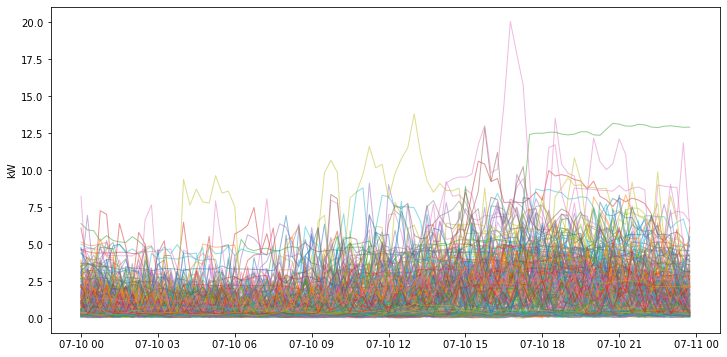

In [16]:
fig,ax=plt.subplots(figsize=(12,6))
plt.plot(long_df.T,alpha=0.5,lw=1)
plt.ylabel('kW')
plt.show()#过度绘制严重

## K_means聚类

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics

In [18]:
load_df=np.array(long_df)

In [19]:
class EnergyFingerPrints():
     
    def __init__(self,data):
        # 统计每个聚类簇的中心点
        self.means = [] 
        self.data = data

    def elbow_method(self,n_clusters):
        fig,ax=plt.subplots(figsize=(12,7)) 
        distortions = []

        for i in range(2, n_clusters):
            km = KMeans(n_clusters = i, 
                        init='k-means++', #初始中心簇的获取方式
                        n_init=10,        #初始中心簇的迭代次数
                        max_iter=300,     #数据分类的迭代次数
                        random_state=0)   #初始化中心簇的方式
            km.fit(self.data)
            distortions.append(sum(np.min(cdist(self.data, km.cluster_centers_, 'euclidean'), axis=1))/self.data.shape[0]) 
            #km.inertia_计算样本点到最近的中心点的距离之和,但这里计算平均离差    

        plt.plot(range(2,n_clusters), distortions, marker='o',lw=1)
        plt.xlabel('聚类数量')
        plt.ylabel('平均离差')
        plt.show() 
    
    def ch_score(self,n_clusters):
        for i in range(2, n_clusters):
            pred=KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=300,random_state=0).fit_predict(self.data)
            score=metrics.calinski_harabasz_score(self.data,pred)
            print("聚类%d簇的calinski_harabaz分数为：%f" %(i,score))
            
            
    def sc_score(self,n_clusters):
        silhouettescore=[]
        for i in range(2,n_clusters):
            pred=KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=300,random_state=0).fit_predict(self.data)
            score=metrics.silhouette_score(self.data,pred)
            silhouettescore.append(score)
            
        plt.figure(figsize=(12,7))
        plt.plot(range(2,n_clusters),silhouettescore,linewidth=1.5,linestyle='-')
        plt.show()
        
    def get_cluster_counts(self): #统计聚类簇和每个簇中样本的数量
        return pd.Series(self.predictions).value_counts()
    
    def labels(self,n_clusters): #确定每簇中样本的具体划分
        self.n_clusters = n_clusters
        return KMeans(self.n_clusters, init='k-means++', n_init=10,max_iter=300,random_state=0).fit(self.data).labels_
        
    def fit(self,n_clusters): #基于划分簇的数量，对数据进行聚类分析
        self.n_clusters = n_clusters
        self.kmeans = KMeans(self.n_clusters)
        self.predictions = self.kmeans.fit_predict(self.data)

    def plot(self): #分别绘制各簇中的用户用电行为曲线，并绘制各簇的平均用电行为曲线
        self.cluster_names = [str(x) for x in range(self.n_clusters)]
        fig=plt.figure(figsize=(12,15))

        for i in range(0,self.n_clusters):
            all_data = [] 
            
            for x,y in zip(self.data,self.predictions):
                    if y == i:
                        all_data.append(x)
                        plt.subplot(3,1,i+1)
                        plt.plot(x,alpha=0.06,color="blue")
                        #plt.ylim(0,4)
                        plt.xlim(0,96)
                        plt.title('Cluster {}'.format(i+1))
                        plt.ylabel('用电量/kW')
                    
            all_data_array = np.array(all_data)
            mean = all_data_array.mean(axis=0)
            self.means.append(mean)
            plt.plot(mean, color="black",linewidth=4)
        
        plt.show()
        
    def plot_energy_fingerprints(self): #将各簇的用电行为数据绘制在一张表上
        fig=plt.figure(figsize=(12,7))
        
        for i,item in enumerate(self.means):
            plt.plot(item, label = "cluster %s"%(str(i+1)))
            plt.xlim(0,96)
        plt.ylabel('用电量/kW')
        plt.xticks([0,20,40,60,80],['00:00','05:00','10:00','15:00','20:00'],rotation=60)
        plt.grid()
        plt.legend()
        plt.show()

In [20]:
energy_use=EnergyFingerPrints(load_df)

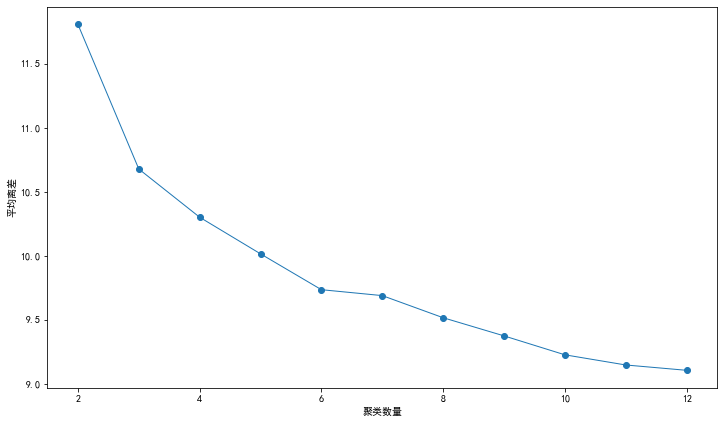

In [21]:
##添加中文标题须用下列代码
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
energy_use.elbow_method(n_clusters=13)#肘部约为3

In [22]:
energy_use.ch_score(n_clusters=13)#分数较高的是2、3、4

聚类2簇的calinski_harabaz分数为：100.071605
聚类3簇的calinski_harabaz分数为：79.691669
聚类4簇的calinski_harabaz分数为：64.149186
聚类5簇的calinski_harabaz分数为：54.142728
聚类6簇的calinski_harabaz分数为：47.468286
聚类7簇的calinski_harabaz分数为：41.504194
聚类8簇的calinski_harabaz分数为：37.755808
聚类9簇的calinski_harabaz分数为：34.677123
聚类10簇的calinski_harabaz分数为：32.457200
聚类11簇的calinski_harabaz分数为：30.133940
聚类12簇的calinski_harabaz分数为：27.914106


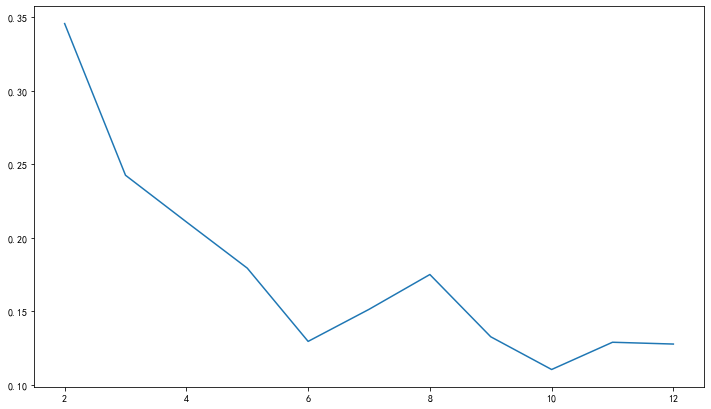

In [23]:
energy_use.sc_score(n_clusters=13)# 结果发现斜率变化最快的是7-8以及5-6段

所以综上三种方法我们选择分为3类

In [24]:
energy_use.fit(n_clusters=3)
num=long_df.index
label=energy_use.labels(n_clusters = 3)
result=pd.DataFrame([list(num),list(label)]).T
result.columns=['user_id','cluster']
result.cluster.value_counts()

1    97
2    94
0    24
Name: cluster, dtype: int64

In [25]:
np.array(result.loc[result.cluster ==0].user_id)

array([ 222,  252,  490,  503,  545,  604,  974, 1202, 1283, 1507, 1697,
       1790, 2018, 2094, 2242, 2925, 3126, 3394, 3401, 3500, 3652, 3795,
       3916, 3918], dtype=int64)

<ipython-input-19-ab6ca522da47>:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,i+1)
<ipython-input-19-ab6ca522da47>:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,i+1)
<ipython-input-19-ab6ca522da47>:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

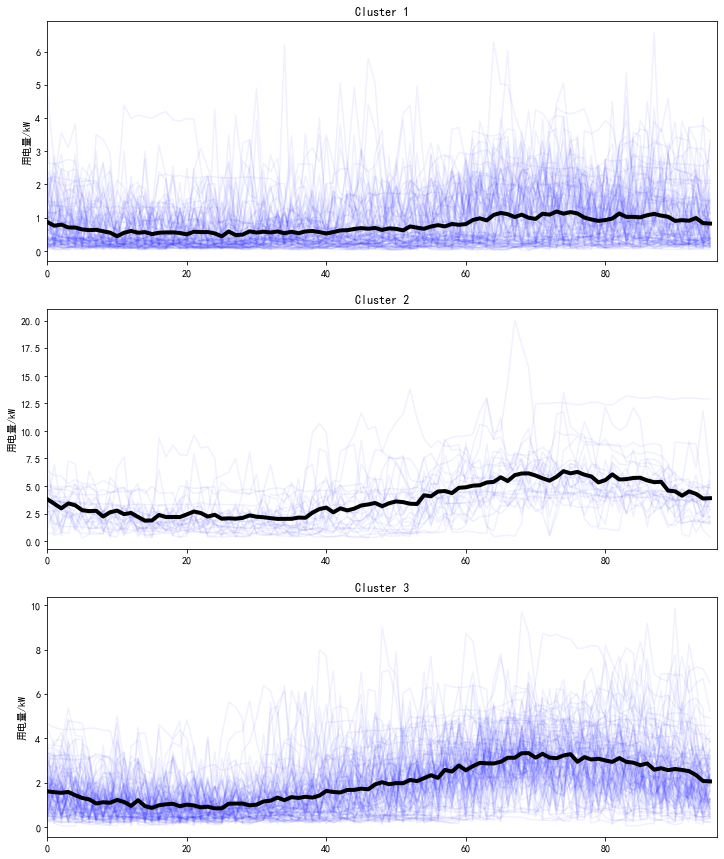

In [26]:
energy_use.plot()

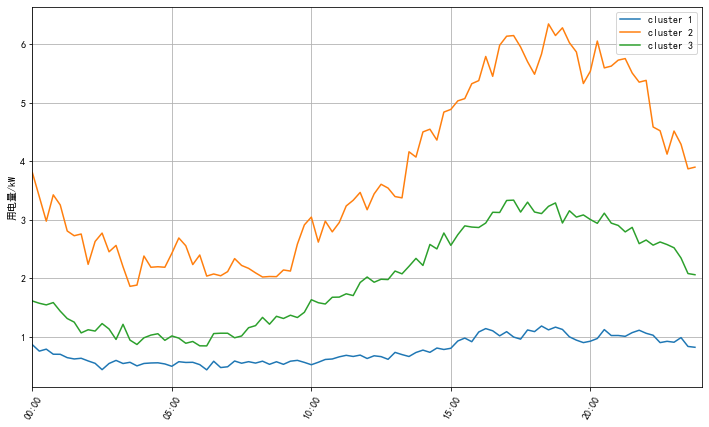

In [27]:
energy_use.plot_energy_fingerprints()

如图所示，我们将用户分为三类
* 第一类用户用电量要明显高于其他两类用户
* 第一类用户和第二类用户在早上7点左右开始用电量增加一直到17-18点达到顶峰，然后逐渐下降
* 第三类用户用电量波动不大，均值大约在0.5-1.2千瓦浮动